# Step 1. Defining Exposures

Exposure describes the set of assets, people, livelihoods, infrastructures, etc. within an area of interest in terms of their geographic location, their value etc.; in brief - everything potentially exposed to hazards.

Using LitPop Exposures:
https://climada-python.readthedocs.io/en/stable/tutorial/climada_entity_LitPop.html


/home/lucas_of/anaconda3/envs/climada_env/lib/python3.11/site-packages/dask/dataframe/_pyarrow_compat.py:17: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 12.0.1. Please consider upgrading.
  warnings.warn(


2024-08-24 23:02:04,657 - climada.entity.exposures.litpop.litpop - INFO - 
 LitPop: Init Exposure for country: BRA (76)...

2024-08-24 23:02:12,383 - climada.entity.exposures.litpop.gpw_population - WARNING - Reference year: 2018. Using nearest available year for GPW data: 2020
2024-08-24 23:02:12,385 - climada.entity.exposures.litpop.gpw_population - INFO - GPW Version v4.11
2024-08-24 23:02:12,476 - climada.entity.exposures.litpop.gpw_population - WARNING - Reference year: 2018. Using nearest available year for GPW data: 2020
2024-08-24 23:02:12,477 - climada.entity.exposures.litpop.gpw_population - INFO - GPW Version v4.11
2024-08-24 23:02:12,649 - climada.entity.exposures.litpop.gpw_population - WARNING - Reference year: 2018. Using nearest available year for GPW data: 2020
2024-08-24 23:02:12,651 - climada.entity.exposures.litpop.gpw_population - INFO - GPW Version v4.11
2024-08-24 23:02:12,696 - climada.entity.exposures.litpop.gpw_population - WARNING - Reference year: 2018. Usin

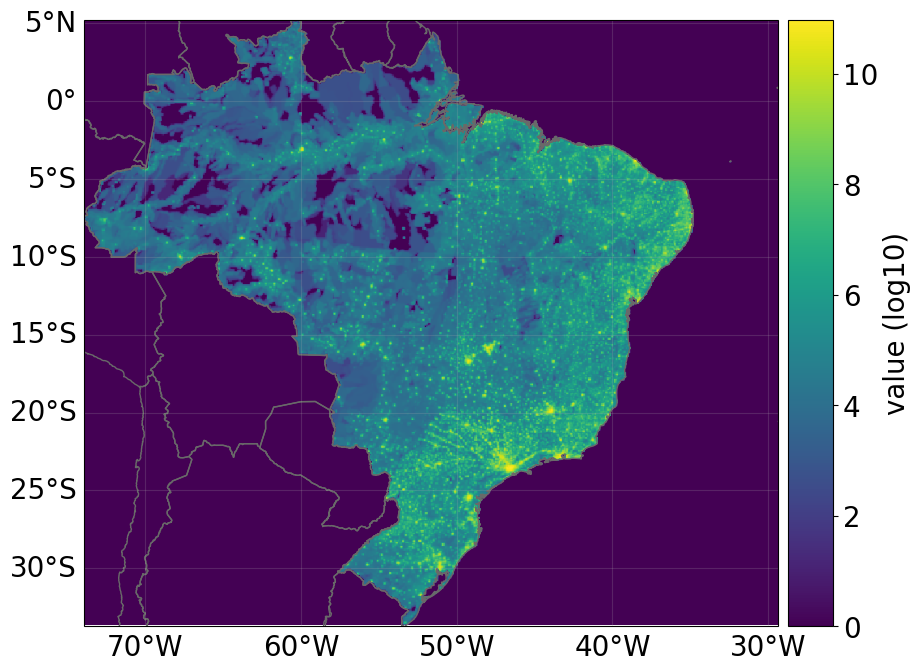

In [1]:
%matplotlib inline
from climada.climadaBR import *

climadabr = ClimadaBR()

# For this cell to work we need the gpw-v4-population-count-rev11_2020_30_sec_tif foulder.
# You can find out more about it in the LitPop tutorial. After downloading, you can copy it to the system
#  directory or to your preferred repository.
# If you are using gpw-v4-population-count-rev11_2020_30_sec_tif (NASA) in the climada system directory 
# "SYSTEM_DIR" you don't need any aditional arguments, but if it is in another directory you can include 
# the path by adding the argument: Path("/path/to/your/directory/").
# For example: climadabr.DefineExposures(['BRA'], 300, 'income_group', Path("/content/Climada_Workspace/climada_python/climada/data/"))
climadabr.DefineExposures(['BRA'], 300, 'income_group')

# Step 2. Defining Hazards

A hazard describes climate-related events such as storms, floods, droughts, or heat waves both in terms of probability of occurrence as well as physical intensity.

**IMPORTANT:** In our project, we will extend the hazards to include events generated by climate change, such as the growth of diseases, mosquito-borne vectors, impacts on crops, pollution, effects on the healthcare system, and any other range of events that we can model from news articles extracted from the portals of the country in question.


/home/lucas_of/anaconda3/envs/climada_env/lib/python3.11/site-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])


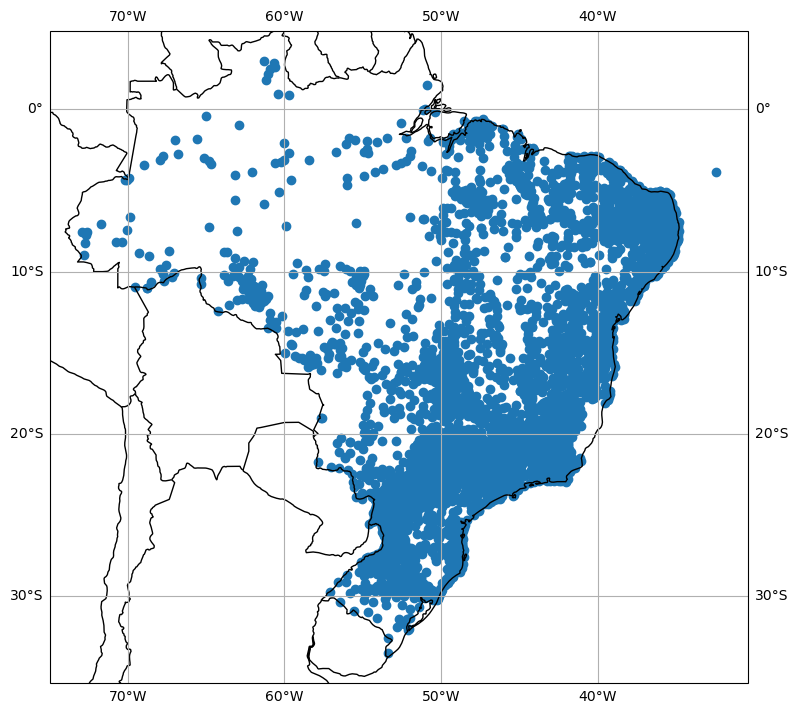

In [2]:
climadabr.HazardFromExcel("TabelaDengueCoord.xlsx")

# Step 3. Computing Impact

The impact is the combined effect of hazard events on a set of exposures mediated by a set of impact functions. By computing the impact for each event (historical and synthetic) and for each exposure value at each geographical location, the Impact provides different risk measures, such as the expected annual impact per exposure, the probable maximum impact for different return periods, and the total average annual impact.

An impact function relates the percentage of damage in the exposure to the hazard intensity, also commonly referred to as a “vulnerability curve” in the modelling community. Every hazard and exposure types are characterized by an impact function.


2024-08-24 23:02:41,400 - climada.entity.exposures.base - INFO - Matching 101818 exposures with 4207 centroids.
2024-08-24 23:02:41,406 - climada.util.coordinates - INFO - No exact centroid match found. Reprojecting coordinates to nearest neighbor closer than the threshold = 100
2024-08-24 23:02:41,526 - climada.util.coordinates - WARNING - Distance to closest centroid is greater than 100km for 20282 coordinates.
2024-08-24 23:02:41,533 - climada.engine.impact_calc - INFO - Calculating impact for 242667 assets (>0) and 4207 events.


--- Logging error ---
Traceback (most recent call last):
  File "/home/lucas_of/anaconda3/envs/climada_env/lib/python3.11/logging/__init__.py", line 1110, in emit
    msg = self.format(record)
          ^^^^^^^^^^^^^^^^^^^
  File "/home/lucas_of/anaconda3/envs/climada_env/lib/python3.11/logging/__init__.py", line 953, in format
    return fmt.format(record)
           ^^^^^^^^^^^^^^^^^^
  File "/home/lucas_of/anaconda3/envs/climada_env/lib/python3.11/logging/__init__.py", line 687, in format
    record.message = record.getMessage()
                     ^^^^^^^^^^^^^^^^^^^
  File "/home/lucas_of/anaconda3/envs/climada_env/lib/python3.11/logging/__init__.py", line 377, in getMessage
    msg = msg % self.args
          ~~~~^~~~~~~~~~~
TypeError: %d format: a real number is required, not str
Call stack:
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/home/lucas_of/anaconda3/envs/climada_env/lib/python3.11/site-packages/ipyke

2024-08-24 23:02:48,076 - climada.util.coordinates - INFO - Setting geometry points.
2024-08-24 23:02:48,412 - climada.util.coordinates - INFO - Raster from resolution 0.08333332999999854 to 0.08333332999999854.
Aggregated average annual impact: 114594573.0 $


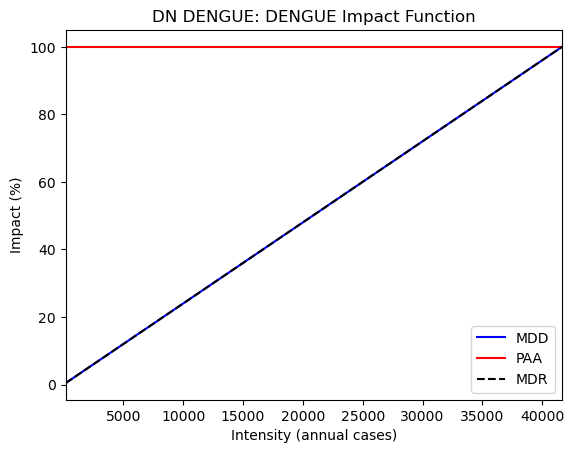

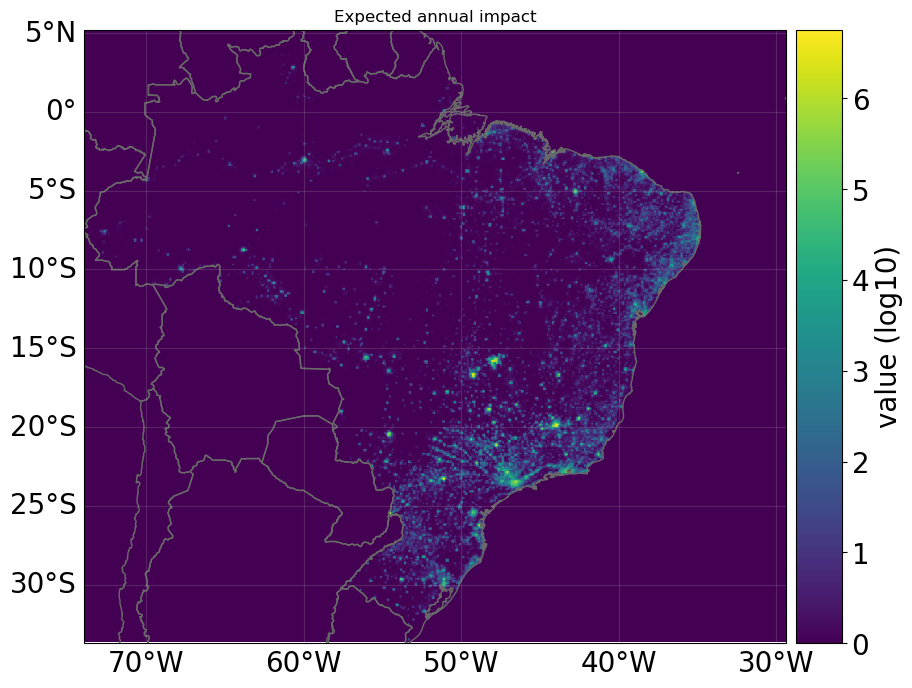

In [3]:
climadabr.DengueImpactFuncSet()
climadabr.ComputeImpact()